In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

from agent import *
from environment import *
from controller import Controller

In [2]:
def getEnvironmentTraining():
    return MTurkSurveyUser(filePaths=[
            'survey/ver2_mturk/results/01_1st_Batch_3137574_batch_results.csv',
            'survey/ver2_mturk/results/02_Batch_3148398_batch_results.csv',
            'survey/ver2_mturk/results/03_Batch_3149214_batch_results.csv',
    ], filterFunc=(lambda r: ord(r['rawWorkerID'][-1]) % 2 == 0), dismissWarningMsg=True)

def getEnvironmentTesting():
    return MTurkSurveyUser(filePaths=[
            'survey/ver2_mturk/results/01_1st_Batch_3137574_batch_results.csv',
            'survey/ver2_mturk/results/02_Batch_3148398_batch_results.csv',
            'survey/ver2_mturk/results/03_Batch_3149214_batch_results.csv',
    ], filterFunc=(lambda r: ord(r['rawWorkerID'][-1]) % 2 == 1), dismissWarningMsg=True)

In [3]:
def getResponseRates(results):
    """
    Returns: (# Total events, # accepts, # dismisses, total rewards)
    """
    notificationEvents = [r for r in results if r['decision']]
    numNotifications = len(notificationEvents)
    numAcceptedNotifications = len([r for r in notificationEvents if r['reward'] > 0])
    numDismissedNotifications = len([r for r in notificationEvents if r['reward'] < 0])
    ratioAccepted = numAcceptedNotifications / numNotifications if numNotifications > 0 else 0
    ratioDismissed = numDismissedNotifications / numNotifications if numNotifications > 0 else 0
    totalRewards = sum([r['reward'] for r in notificationEvents])
    return (numNotifications, ratioAccepted, ratioDismissed, totalRewards)

In [25]:
tmpModelPath = '/tmp/model.txt'
numRounds = 10

In [26]:
agents = [SVMAgent, NNAgent]
trainingSource = [
    (getEnvironmentTraining, 10),
    (getEnvironmentTesting, 1),
    (getEnvironmentTesting, 2),
    (getEnvironmentTesting, 3),
    (getEnvironmentTesting, 4),
    (getEnvironmentTesting, 5),
    (getEnvironmentTesting, 6),
    (getEnvironmentTesting, 7),
    (getEnvironmentTesting, 8),
    (getEnvironmentTesting, 9),
    (getEnvironmentTesting, 10),
]

numAgents = len(agents)
numTrainingTasks = len(trainingSource)
resultReward = np.zeros((numAgents, numTrainingTasks))
resultResponseRatio = np.zeros((numAgents, numTrainingTasks))

In [28]:
for iAgent, AgentClass in enumerate(agents):
    for iTraining, trainingParams in enumerate(trainingSource):
        
        taskRewardHolder = np.zeros(numRounds)
        taskResponseRateHolder = np.zeros(numRounds)
        
        for iRound in range(numRounds):
            trainingEnvorinmentFunc, numTrainingWeeks = trainingParams

            # collecting training data
            agent = ClassifierDataCollectionAgent()
            environment = trainingEnvorinmentFunc()
            controller = Controller(agent, environment, simulationWeek=numTrainingWeeks,
                                    negativeReward=-5, verbose=False)
            controller.execute()
            agent.saveModel(tmpModelPath)

            # testing phase
            agent = AgentClass()
            agent.loadModel(tmpModelPath)
            environment = getEnvironmentTesting()
            controller = Controller(agent, environment, simulationWeek=10,
                                    negativeReward=-5, verbose=False)
            results = controller.execute()
            _, ratioAccepted, ratioDismissed, totalRewards = getResponseRates(results)
            
            taskRewardHolder[iRound] = totalRewards
            taskResponseRateHolder[iRound] = (ratioAccepted / (ratioAccepted + ratioDismissed)
                                              if ratioAccepted + ratioDismissed > 0 else 0.)
            
        resultReward[iAgent, iTraining] = np.mean(taskRewardHolder)
        resultResponseRatio[iAgent, iTraining] = np.mean(taskResponseRateHolder)
            

Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model
Begin to train the model
Epoch 1/20
1644/1644 [==============================] - 1s 375us/step - loss: 1.1145 - acc: 0.3881
Epoch 2/20
1644/1644 [==============================] - 0s 59us/step - loss: 1.0700 - acc: 0.4185
Epoch 3/20
1644/1644 [==============================] - 0s 65us/step - loss: 1.0614 - acc: 0.4453
Epoch 4/20
1644/1644 [==============================] - 0s 67us/step - loss: 1.0512 - acc: 0.4580
Epoch 5/20
1644/1644 [==============================] - 0s 70us/step - loss: 1.0384 - acc: 0.4641
Epoch 6/20
1644/1644 [==============================] - 0s 64us/step - loss: 1.0289 - acc: 0.4751
Epoch 7/20
1644/1644 [==============================] - 0s 60us/step - loss: 1.0294 - acc: 0.4787
Epoch 8/20
1644/1644 [==============================] - 0s 62us/step - loss: 1.0210 - acc: 0.4775
Epoch 9/20
1644/1644 [==============================] - 0s 57us/step - loss: 1.0147 - acc: 0.4848
Epoch 10/20
1644/1644 [==============================] - 0s 59us/s

1620/1620 [==============================] - 1s 491us/step - loss: 1.1324 - acc: 0.3914
Epoch 2/20
1620/1620 [==============================] - 0s 64us/step - loss: 1.0778 - acc: 0.4105
Epoch 3/20
1620/1620 [==============================] - 0s 69us/step - loss: 1.0510 - acc: 0.4346
Epoch 4/20
1620/1620 [==============================] - 0s 70us/step - loss: 1.0441 - acc: 0.4370
Epoch 5/20
1620/1620 [==============================] - 0s 60us/step - loss: 1.0319 - acc: 0.4586
Epoch 6/20
1620/1620 [==============================] - 0s 68us/step - loss: 1.0212 - acc: 0.4654
Epoch 7/20
1620/1620 [==============================] - 0s 67us/step - loss: 1.0117 - acc: 0.4685
Epoch 8/20
1620/1620 [==============================] - 0s 68us/step - loss: 1.0156 - acc: 0.4815
Epoch 9/20
1620/1620 [==============================] - 0s 62us/step - loss: 0.9955 - acc: 0.4975
Epoch 10/20
1620/1620 [==============================] - 0s 72us/step - loss: 1.0005 - acc: 0.4796
Epoch 11/20
1620/1620 [======

1622/1622 [==============================] - 0s 67us/step - loss: 1.0843 - acc: 0.4026
Epoch 3/20
1622/1622 [==============================] - 0s 66us/step - loss: 1.0698 - acc: 0.4236
Epoch 4/20
1622/1622 [==============================] - 0s 67us/step - loss: 1.0557 - acc: 0.4316
Epoch 5/20
1622/1622 [==============================] - 0s 73us/step - loss: 1.0523 - acc: 0.4488
Epoch 6/20
1622/1622 [==============================] - 0s 68us/step - loss: 1.0351 - acc: 0.4692
Epoch 7/20
1622/1622 [==============================] - 0s 67us/step - loss: 1.0325 - acc: 0.4655
Epoch 8/20
1622/1622 [==============================] - 0s 61us/step - loss: 1.0218 - acc: 0.4729
Epoch 9/20
1622/1622 [==============================] - 0s 61us/step - loss: 1.0073 - acc: 0.4864
Epoch 10/20
1622/1622 [==============================] - 0s 61us/step - loss: 1.0218 - acc: 0.4735
Epoch 11/20
1622/1622 [==============================] - 0s 63us/step - loss: 1.0041 - acc: 0.4803
Epoch 12/20
1622/1622 [======

Epoch 4/20
167/167 [==============================] - 0s 101us/step - loss: 1.1359 - acc: 0.3713
Epoch 5/20
167/167 [==============================] - 0s 75us/step - loss: 1.0910 - acc: 0.4192
Epoch 6/20
167/167 [==============================] - 0s 86us/step - loss: 1.1145 - acc: 0.3772
Epoch 7/20
167/167 [==============================] - 0s 79us/step - loss: 1.0499 - acc: 0.4491
Epoch 8/20
167/167 [==============================] - 0s 85us/step - loss: 1.1114 - acc: 0.3174
Epoch 9/20
167/167 [==============================] - 0s 106us/step - loss: 1.1210 - acc: 0.3713
Epoch 10/20
167/167 [==============================] - 0s 96us/step - loss: 1.0979 - acc: 0.3832
Epoch 11/20
167/167 [==============================] - 0s 101us/step - loss: 1.0740 - acc: 0.4132
Epoch 12/20
167/167 [==============================] - 0s 80us/step - loss: 1.0670 - acc: 0.4731
Epoch 13/20
167/167 [==============================] - 0s 72us/step - loss: 1.0787 - acc: 0.4072
Epoch 14/20
167/167 [============

157/157 [==============================] - 0s 92us/step - loss: 1.0916 - acc: 0.4013
Epoch 7/20
157/157 [==============================] - 0s 99us/step - loss: 1.1267 - acc: 0.3439
Epoch 8/20
157/157 [==============================] - 0s 70us/step - loss: 1.0776 - acc: 0.4204
Epoch 9/20
157/157 [==============================] - 0s 70us/step - loss: 1.0759 - acc: 0.4522
Epoch 10/20
157/157 [==============================] - 0s 80us/step - loss: 1.0302 - acc: 0.4522
Epoch 11/20
157/157 [==============================] - 0s 68us/step - loss: 1.0519 - acc: 0.3885
Epoch 12/20
157/157 [==============================] - 0s 77us/step - loss: 1.0844 - acc: 0.3758
Epoch 13/20
157/157 [==============================] - 0s 108us/step - loss: 1.0710 - acc: 0.4395
Epoch 14/20
157/157 [==============================] - 0s 77us/step - loss: 1.0724 - acc: 0.4204
Epoch 15/20
157/157 [==============================] - 0s 73us/step - loss: 1.0254 - acc: 0.4841
Epoch 16/20
157/157 [=======================

330/330 [==============================] - 0s 75us/step - loss: 1.0674 - acc: 0.4333
Epoch 9/20
330/330 [==============================] - 0s 71us/step - loss: 1.0413 - acc: 0.4879
Epoch 10/20
330/330 [==============================] - 0s 70us/step - loss: 1.0464 - acc: 0.4667
Epoch 11/20
330/330 [==============================] - 0s 102us/step - loss: 1.0459 - acc: 0.4697
Epoch 12/20
330/330 [==============================] - 0s 70us/step - loss: 1.0371 - acc: 0.4424
Epoch 13/20
330/330 [==============================] - 0s 70us/step - loss: 1.0355 - acc: 0.4364
Epoch 14/20
330/330 [==============================] - 0s 77us/step - loss: 1.0222 - acc: 0.4818
Epoch 15/20
330/330 [==============================] - 0s 74us/step - loss: 1.0105 - acc: 0.4697
Epoch 16/20
330/330 [==============================] - 0s 73us/step - loss: 1.0255 - acc: 0.4606
Epoch 17/20
330/330 [==============================] - 0s 70us/step - loss: 1.0034 - acc: 0.5061
Epoch 18/20
330/330 [=====================

319/319 [==============================] - 0s 72us/step - loss: 1.0952 - acc: 0.3386
Epoch 11/20
319/319 [==============================] - 0s 74us/step - loss: 1.0780 - acc: 0.4013
Epoch 12/20
319/319 [==============================] - 0s 74us/step - loss: 1.0814 - acc: 0.4138
Epoch 13/20
319/319 [==============================] - 0s 89us/step - loss: 1.0646 - acc: 0.4075
Epoch 14/20
319/319 [==============================] - 0s 92us/step - loss: 1.0816 - acc: 0.4107
Epoch 15/20
319/319 [==============================] - 0s 75us/step - loss: 1.0705 - acc: 0.3762
Epoch 16/20
319/319 [==============================] - 0s 81us/step - loss: 1.0474 - acc: 0.4075
Epoch 17/20
319/319 [==============================] - 0s 81us/step - loss: 1.0489 - acc: 0.4107
Epoch 18/20
319/319 [==============================] - 0s 92us/step - loss: 1.0397 - acc: 0.4201
Epoch 19/20
319/319 [==============================] - 0s 73us/step - loss: 1.0313 - acc: 0.4138
Epoch 20/20
319/319 [=====================

335/335 [==============================] - 0s 99us/step - loss: 1.0601 - acc: 0.4806
Epoch 13/20
335/335 [==============================] - 0s 100us/step - loss: 1.0848 - acc: 0.4328
Epoch 14/20
335/335 [==============================] - 0s 123us/step - loss: 1.0550 - acc: 0.4328
Epoch 15/20
335/335 [==============================] - 0s 88us/step - loss: 1.0513 - acc: 0.4657
Epoch 16/20
335/335 [==============================] - 0s 84us/step - loss: 1.0604 - acc: 0.4716
Epoch 17/20
335/335 [==============================] - 0s 93us/step - loss: 1.0441 - acc: 0.4836
Epoch 18/20
335/335 [==============================] - 0s 89us/step - loss: 1.0454 - acc: 0.4716
Epoch 19/20
335/335 [==============================] - 0s 85us/step - loss: 1.0292 - acc: 0.4806
Epoch 20/20
335/335 [==============================] - 0s 82us/step - loss: 1.0488 - acc: 0.4448
Finish training the model
Begin to train the model
Epoch 1/20
351/351 [==============================] - 1s 4ms/step - loss: 1.1672 - acc

492/492 [==============================] - 0s 72us/step - loss: 1.0401 - acc: 0.4593
Epoch 15/20
492/492 [==============================] - 0s 92us/step - loss: 0.9976 - acc: 0.5041
Epoch 16/20
492/492 [==============================] - 0s 83us/step - loss: 1.0158 - acc: 0.4817
Epoch 17/20
492/492 [==============================] - 0s 87us/step - loss: 1.0344 - acc: 0.4593
Epoch 18/20
492/492 [==============================] - 0s 75us/step - loss: 0.9901 - acc: 0.5000
Epoch 19/20
492/492 [==============================] - 0s 75us/step - loss: 0.9926 - acc: 0.5102
Epoch 20/20
492/492 [==============================] - 0s 80us/step - loss: 1.0045 - acc: 0.5020
Finish training the model
Begin to train the model
Epoch 1/20
500/500 [==============================] - 2s 3ms/step - loss: 1.1780 - acc: 0.3360
Epoch 2/20
500/500 [==============================] - 0s 78us/step - loss: 1.1248 - acc: 0.3580
Epoch 3/20
500/500 [==============================] - 0s 75us/step - loss: 1.1072 - acc: 0.

501/501 [==============================] - 0s 90us/step - loss: 1.0501 - acc: 0.4790
Epoch 17/20
501/501 [==============================] - 0s 89us/step - loss: 1.0516 - acc: 0.4491
Epoch 18/20
501/501 [==============================] - 0s 86us/step - loss: 1.0304 - acc: 0.4591
Epoch 19/20
501/501 [==============================] - 0s 87us/step - loss: 1.0438 - acc: 0.4491
Epoch 20/20
501/501 [==============================] - 0s 90us/step - loss: 1.0273 - acc: 0.4731
Finish training the model
Begin to train the model
Epoch 1/20
449/449 [==============================] - 2s 4ms/step - loss: 1.2632 - acc: 0.3541
Epoch 2/20
449/449 [==============================] - 0s 146us/step - loss: 1.2122 - acc: 0.3408
Epoch 3/20
449/449 [==============================] - 0s 100us/step - loss: 1.1634 - acc: 0.3675
Epoch 4/20
449/449 [==============================] - 0s 128us/step - loss: 1.1558 - acc: 0.3452
Epoch 5/20
449/449 [==============================] - 0s 116us/step - loss: 1.1037 - acc: 

663/663 [==============================] - 0s 97us/step - loss: 1.0159 - acc: 0.4555
Epoch 19/20
663/663 [==============================] - 0s 105us/step - loss: 1.0091 - acc: 0.4630
Epoch 20/20
663/663 [==============================] - 0s 106us/step - loss: 1.0003 - acc: 0.4796
Finish training the model
Begin to train the model
Epoch 1/20
638/638 [==============================] - 2s 3ms/step - loss: 1.1258 - acc: 0.3417
Epoch 2/20
638/638 [==============================] - 0s 81us/step - loss: 1.0930 - acc: 0.3903
Epoch 3/20
638/638 [==============================] - 0s 95us/step - loss: 1.0950 - acc: 0.3903
Epoch 4/20
638/638 [==============================] - 0s 81us/step - loss: 1.0812 - acc: 0.4044
Epoch 5/20
638/638 [==============================] - 0s 80us/step - loss: 1.0751 - acc: 0.4232
Epoch 6/20
638/638 [==============================] - 0s 80us/step - loss: 1.0742 - acc: 0.4201
Epoch 7/20
638/638 [==============================] - 0s 103us/step - loss: 1.0628 - acc: 0.4

649/649 [==============================] - 0s 93us/step - loss: 1.0317 - acc: 0.4792
Finish training the model
Begin to train the model
Epoch 1/20
680/680 [==============================] - 2s 3ms/step - loss: 1.1378 - acc: 0.3515
Epoch 2/20
680/680 [==============================] - 0s 94us/step - loss: 1.1287 - acc: 0.3574
Epoch 3/20
680/680 [==============================] - 0s 94us/step - loss: 1.1049 - acc: 0.3662
Epoch 4/20
680/680 [==============================] - 0s 91us/step - loss: 1.0864 - acc: 0.3853
Epoch 5/20
680/680 [==============================] - 0s 82us/step - loss: 1.0813 - acc: 0.4294
Epoch 6/20
680/680 [==============================] - 0s 89us/step - loss: 1.0580 - acc: 0.4235
Epoch 7/20
680/680 [==============================] - 0s 84us/step - loss: 1.0593 - acc: 0.4632
Epoch 8/20
680/680 [==============================] - 0s 92us/step - loss: 1.0556 - acc: 0.4162
Epoch 9/20
680/680 [==============================] - 0s 84us/step - loss: 1.0525 - acc: 0.4500
E

655/655 [==============================] - 0s 89us/step - loss: 1.1040 - acc: 0.4061
Epoch 3/20
655/655 [==============================] - 0s 79us/step - loss: 1.0847 - acc: 0.4153
Epoch 4/20
655/655 [==============================] - 0s 89us/step - loss: 1.0571 - acc: 0.4412
Epoch 5/20
655/655 [==============================] - 0s 95us/step - loss: 1.0693 - acc: 0.4244
Epoch 6/20
655/655 [==============================] - 0s 89us/step - loss: 1.0624 - acc: 0.4550
Epoch 7/20
655/655 [==============================] - 0s 98us/step - loss: 1.0518 - acc: 0.4641
Epoch 8/20
655/655 [==============================] - 0s 80us/step - loss: 1.0403 - acc: 0.4931
Epoch 9/20
655/655 [==============================] - 0s 99us/step - loss: 1.0388 - acc: 0.4885
Epoch 10/20
655/655 [==============================] - 0s 79us/step - loss: 1.0338 - acc: 0.4702
Epoch 11/20
655/655 [==============================] - 0s 93us/step - loss: 1.0271 - acc: 0.4947
Epoch 12/20
655/655 [============================

845/845 [==============================] - 0s 96us/step - loss: 1.0659 - acc: 0.4533
Epoch 5/20
845/845 [==============================] - 0s 87us/step - loss: 1.0560 - acc: 0.4710
Epoch 6/20
845/845 [==============================] - 0s 101us/step - loss: 1.0516 - acc: 0.4698
Epoch 7/20
845/845 [==============================] - 0s 105us/step - loss: 1.0367 - acc: 0.4970
Epoch 8/20
845/845 [==============================] - 0s 91us/step - loss: 1.0358 - acc: 0.4805
Epoch 9/20
845/845 [==============================] - 0s 94us/step - loss: 1.0268 - acc: 0.4864
Epoch 10/20
845/845 [==============================] - 0s 96us/step - loss: 1.0259 - acc: 0.4746
Epoch 11/20
845/845 [==============================] - 0s 111us/step - loss: 1.0169 - acc: 0.4864
Epoch 12/20
845/845 [==============================] - 0s 103us/step - loss: 1.0195 - acc: 0.4840
Epoch 13/20
845/845 [==============================] - 0s 96us/step - loss: 1.0036 - acc: 0.5243
Epoch 14/20
845/845 [======================

902/902 [==============================] - 0s 84us/step - loss: 1.0187 - acc: 0.5000
Epoch 7/20
902/902 [==============================] - 0s 82us/step - loss: 1.0277 - acc: 0.4667
Epoch 8/20
902/902 [==============================] - 0s 84us/step - loss: 1.0028 - acc: 0.4933
Epoch 9/20
902/902 [==============================] - 0s 83us/step - loss: 1.0022 - acc: 0.5133
Epoch 10/20
902/902 [==============================] - 0s 85us/step - loss: 0.9992 - acc: 0.5122
Epoch 11/20
902/902 [==============================] - 0s 83us/step - loss: 0.9822 - acc: 0.5166
Epoch 12/20
902/902 [==============================] - 0s 84us/step - loss: 0.9922 - acc: 0.5244
Epoch 13/20
902/902 [==============================] - 0s 80us/step - loss: 0.9791 - acc: 0.5277
Epoch 14/20
902/902 [==============================] - 0s 81us/step - loss: 0.9758 - acc: 0.5399
Epoch 15/20
902/902 [==============================] - 0s 85us/step - loss: 0.9788 - acc: 0.5166
Epoch 16/20
902/902 [========================

987/987 [==============================] - 0s 97us/step - loss: 1.0341 - acc: 0.4519
Epoch 9/20
987/987 [==============================] - 0s 90us/step - loss: 1.0352 - acc: 0.4509
Epoch 10/20
987/987 [==============================] - 0s 87us/step - loss: 1.0090 - acc: 0.4944
Epoch 11/20
987/987 [==============================] - 0s 91us/step - loss: 1.0166 - acc: 0.4802
Epoch 12/20
987/987 [==============================] - 0s 93us/step - loss: 1.0085 - acc: 0.4823
Epoch 13/20
987/987 [==============================] - 0s 88us/step - loss: 1.0229 - acc: 0.4650
Epoch 14/20
987/987 [==============================] - 0s 92us/step - loss: 0.9894 - acc: 0.4802
Epoch 15/20
987/987 [==============================] - 0s 88us/step - loss: 1.0183 - acc: 0.4762
Epoch 16/20
987/987 [==============================] - 0s 91us/step - loss: 0.9929 - acc: 0.5106
Epoch 17/20
987/987 [==============================] - 0s 89us/step - loss: 1.0015 - acc: 0.5046
Epoch 18/20
987/987 [======================

988/988 [==============================] - 0s 104us/step - loss: 1.0577 - acc: 0.4251
Epoch 10/20
988/988 [==============================] - 0s 96us/step - loss: 1.0370 - acc: 0.4727
Epoch 11/20
988/988 [==============================] - 0s 127us/step - loss: 1.0373 - acc: 0.4787
Epoch 12/20
988/988 [==============================] - 0s 115us/step - loss: 1.0484 - acc: 0.4636
Epoch 13/20
988/988 [==============================] - 0s 111us/step - loss: 1.0238 - acc: 0.5010
Epoch 14/20
988/988 [==============================] - 0s 104us/step - loss: 1.0400 - acc: 0.4737
Epoch 15/20
988/988 [==============================] - 0s 89us/step - loss: 1.0389 - acc: 0.4929
Epoch 16/20
988/988 [==============================] - 0s 104us/step - loss: 1.0246 - acc: 0.4818
Epoch 17/20
988/988 [==============================] - 0s 94us/step - loss: 1.0183 - acc: 0.4879
Epoch 18/20
988/988 [==============================] - 0s 93us/step - loss: 1.0216 - acc: 0.4970
Epoch 19/20
988/988 [===============

954/954 [==============================] - 0s 88us/step - loss: 1.0448 - acc: 0.4581
Epoch 12/20
954/954 [==============================] - 0s 92us/step - loss: 1.0271 - acc: 0.4780
Epoch 13/20
954/954 [==============================] - 0s 91us/step - loss: 1.0270 - acc: 0.4895
Epoch 14/20
954/954 [==============================] - 0s 92us/step - loss: 1.0219 - acc: 0.5000
Epoch 15/20
954/954 [==============================] - 0s 91us/step - loss: 1.0048 - acc: 0.5052
Epoch 16/20
954/954 [==============================] - 0s 85us/step - loss: 1.0190 - acc: 0.4759
Epoch 17/20
954/954 [==============================] - 0s 86us/step - loss: 1.0203 - acc: 0.5010
Epoch 18/20
954/954 [==============================] - 0s 106us/step - loss: 1.0030 - acc: 0.4927
Epoch 19/20
954/954 [==============================] - 0s 86us/step - loss: 1.0093 - acc: 0.5052
Epoch 20/20
954/954 [==============================] - 0s 89us/step - loss: 0.9922 - acc: 0.5157
Finish training the model
Begin to train 

1163/1163 [==============================] - 0s 207us/step - loss: 1.0332 - acc: 0.4643
Epoch 13/20
1163/1163 [==============================] - 0s 228us/step - loss: 1.0330 - acc: 0.4523
Epoch 14/20
1163/1163 [==============================] - 0s 137us/step - loss: 1.0339 - acc: 0.4600
Epoch 15/20
1163/1163 [==============================] - 0s 96us/step - loss: 1.0213 - acc: 0.4936
Epoch 16/20
1163/1163 [==============================] - 0s 93us/step - loss: 1.0316 - acc: 0.4695
Epoch 17/20
1163/1163 [==============================] - 0s 99us/step - loss: 1.0403 - acc: 0.4669
Epoch 18/20
1163/1163 [==============================] - 0s 96us/step - loss: 1.0364 - acc: 0.4910
Epoch 19/20
1163/1163 [==============================] - 0s 98us/step - loss: 1.0199 - acc: 0.4807
Epoch 20/20
1163/1163 [==============================] - 0s 114us/step - loss: 1.0067 - acc: 0.4901
Finish training the model
Begin to train the model
Epoch 1/20
1150/1150 [==============================] - 3s 3ms/ste

1147/1147 [==============================] - 0s 100us/step - loss: 1.0337 - acc: 0.4699
Epoch 13/20
1147/1147 [==============================] - 0s 98us/step - loss: 1.0282 - acc: 0.4865
Epoch 14/20
1147/1147 [==============================] - 0s 94us/step - loss: 1.0426 - acc: 0.4638
Epoch 15/20
1147/1147 [==============================] - 0s 112us/step - loss: 1.0372 - acc: 0.4778
Epoch 16/20
1147/1147 [==============================] - 0s 206us/step - loss: 1.0145 - acc: 0.5109
Epoch 17/20
1147/1147 [==============================] - 0s 145us/step - loss: 1.0148 - acc: 0.5205
Epoch 18/20
1147/1147 [==============================] - 0s 95us/step - loss: 1.0128 - acc: 0.4917
Epoch 19/20
1147/1147 [==============================] - 0s 94us/step - loss: 1.0202 - acc: 0.4926
Epoch 20/20
1147/1147 [==============================] - 0s 100us/step - loss: 1.0140 - acc: 0.5109
Finish training the model
Begin to train the model
Epoch 1/20
1184/1184 [==============================] - 3s 3ms/st

1314/1314 [==============================] - 0s 96us/step - loss: 1.0098 - acc: 0.4779
Epoch 14/20
1314/1314 [==============================] - 0s 94us/step - loss: 1.0017 - acc: 0.4802
Epoch 15/20
1314/1314 [==============================] - 0s 94us/step - loss: 1.0032 - acc: 0.5038
Epoch 16/20
1314/1314 [==============================] - 0s 99us/step - loss: 1.0010 - acc: 0.4916
Epoch 17/20
1314/1314 [==============================] - 0s 95us/step - loss: 1.0004 - acc: 0.4901
Epoch 18/20
1314/1314 [==============================] - 0s 94us/step - loss: 0.9849 - acc: 0.4939
Epoch 19/20
1314/1314 [==============================] - 0s 97us/step - loss: 0.9934 - acc: 0.4970
Epoch 20/20
1314/1314 [==============================] - 0s 111us/step - loss: 0.9974 - acc: 0.4893
Finish training the model
Begin to train the model
Epoch 1/20
1365/1365 [==============================] - 3s 2ms/step - loss: 1.1299 - acc: 0.3788
Epoch 2/20
1365/1365 [==============================] - 0s 110us/step -

1356/1356 [==============================] - 0s 96us/step - loss: 1.0015 - acc: 0.4919
Epoch 14/20
1356/1356 [==============================] - 0s 98us/step - loss: 0.9938 - acc: 0.5088
Epoch 15/20
1356/1356 [==============================] - 0s 97us/step - loss: 0.9984 - acc: 0.5037
Epoch 16/20
1356/1356 [==============================] - 0s 98us/step - loss: 0.9996 - acc: 0.5133
Epoch 17/20
1356/1356 [==============================] - 0s 98us/step - loss: 0.9973 - acc: 0.4904
Epoch 18/20
1356/1356 [==============================] - 0s 94us/step - loss: 0.9842 - acc: 0.5147
Epoch 19/20
1356/1356 [==============================] - 0s 99us/step - loss: 0.9881 - acc: 0.5221
Epoch 20/20
1356/1356 [==============================] - 0s 101us/step - loss: 0.9811 - acc: 0.5221
Finish training the model
Begin to train the model
Epoch 1/20
1359/1359 [==============================] - 3s 2ms/step - loss: 1.1310 - acc: 0.3723
Epoch 2/20
1359/1359 [==============================] - 0s 99us/step - 

1277/1277 [==============================] - 0s 105us/step - loss: 1.0140 - acc: 0.4769
Epoch 14/20
1277/1277 [==============================] - 0s 104us/step - loss: 1.0062 - acc: 0.4980
Epoch 15/20
1277/1277 [==============================] - 0s 107us/step - loss: 1.0195 - acc: 0.4808
Epoch 16/20
1277/1277 [==============================] - 0s 115us/step - loss: 0.9920 - acc: 0.5137
Epoch 17/20
1277/1277 [==============================] - 0s 124us/step - loss: 1.0022 - acc: 0.5067
Epoch 18/20
1277/1277 [==============================] - 0s 152us/step - loss: 1.0031 - acc: 0.5090
Epoch 19/20
1277/1277 [==============================] - 0s 104us/step - loss: 0.9846 - acc: 0.5012
Epoch 20/20
1277/1277 [==============================] - 0s 107us/step - loss: 0.9919 - acc: 0.4949
Finish training the model
Begin to train the model
Epoch 1/20
1406/1406 [==============================] - 4s 3ms/step - loss: 1.1413 - acc: 0.3627
Epoch 2/20
1406/1406 [==============================] - 0s 113us

1566/1566 [==============================] - 0s 109us/step - loss: 0.9851 - acc: 0.4981
Epoch 14/20
1566/1566 [==============================] - 0s 127us/step - loss: 0.9971 - acc: 0.4911
Epoch 15/20
1566/1566 [==============================] - 0s 109us/step - loss: 0.9953 - acc: 0.5051
Epoch 16/20
1566/1566 [==============================] - 0s 105us/step - loss: 0.9973 - acc: 0.5096
Epoch 17/20
1566/1566 [==============================] - 0s 113us/step - loss: 0.9830 - acc: 0.4987
Epoch 18/20
1566/1566 [==============================] - 0s 119us/step - loss: 0.9838 - acc: 0.5038
Epoch 19/20
1566/1566 [==============================] - 0s 128us/step - loss: 0.9853 - acc: 0.4917
Epoch 20/20
1566/1566 [==============================] - 0s 122us/step - loss: 0.9770 - acc: 0.5268
Finish training the model
Begin to train the model
Epoch 1/20
1510/1510 [==============================] - 4s 3ms/step - loss: 1.1595 - acc: 0.3252
Epoch 2/20
1510/1510 [==============================] - 0s 165us

1580/1580 [==============================] - 0s 212us/step - loss: 0.9759 - acc: 0.5152
Epoch 14/20
1580/1580 [==============================] - 0s 136us/step - loss: 0.9884 - acc: 0.5120
Epoch 15/20
1580/1580 [==============================] - 0s 120us/step - loss: 0.9892 - acc: 0.5196
Epoch 16/20
1580/1580 [==============================] - 0s 115us/step - loss: 0.9868 - acc: 0.5278
Epoch 17/20
1580/1580 [==============================] - 0s 115us/step - loss: 0.9688 - acc: 0.5297
Epoch 18/20
1580/1580 [==============================] - 0s 103us/step - loss: 0.9699 - acc: 0.5380
Epoch 19/20
1580/1580 [==============================] - 0s 132us/step - loss: 0.9751 - acc: 0.5203
Epoch 20/20
1580/1580 [==============================] - 0s 118us/step - loss: 0.9725 - acc: 0.5266
Finish training the model
Begin to train the model
Epoch 1/20
1443/1443 [==============================] - 4s 3ms/step - loss: 1.1424 - acc: 0.3742
Epoch 2/20
1443/1443 [==============================] - 0s 121us

1610/1610 [==============================] - 0s 107us/step - loss: 0.9954 - acc: 0.5186
Epoch 14/20
1610/1610 [==============================] - 0s 109us/step - loss: 0.9898 - acc: 0.5186
Epoch 15/20
1610/1610 [==============================] - 0s 195us/step - loss: 0.9852 - acc: 0.5174
Epoch 16/20
1610/1610 [==============================] - 0s 151us/step - loss: 0.9939 - acc: 0.5205
Epoch 17/20
1610/1610 [==============================] - 0s 170us/step - loss: 0.9912 - acc: 0.5099
Epoch 18/20
1610/1610 [==============================] - 0s 180us/step - loss: 0.9834 - acc: 0.5137
Epoch 19/20
1610/1610 [==============================] - 0s 180us/step - loss: 0.9808 - acc: 0.5261
Epoch 20/20
1610/1610 [==============================] - 0s 120us/step - loss: 0.9754 - acc: 0.5317
Finish training the model
Begin to train the model
Epoch 1/20
1568/1568 [==============================] - 4s 2ms/step - loss: 1.1148 - acc: 0.3795
Epoch 2/20
1568/1568 [==============================] - 0s 110us

1641/1641 [==============================] - 0s 111us/step - loss: 1.0174 - acc: 0.4729
Epoch 14/20
1641/1641 [==============================] - 0s 115us/step - loss: 1.0274 - acc: 0.4839
Epoch 15/20
1641/1641 [==============================] - 0s 113us/step - loss: 1.0247 - acc: 0.4711
Epoch 16/20
1641/1641 [==============================] - 0s 121us/step - loss: 1.0172 - acc: 0.5027
Epoch 17/20
1641/1641 [==============================] - 0s 115us/step - loss: 1.0057 - acc: 0.4960
Epoch 18/20
1641/1641 [==============================] - 0s 138us/step - loss: 1.0143 - acc: 0.4924
Epoch 19/20
1641/1641 [==============================] - 0s 135us/step - loss: 1.0092 - acc: 0.4906
Epoch 20/20
1641/1641 [==============================] - 0s 140us/step - loss: 1.0132 - acc: 0.4924
Finish training the model
Begin to train the model
Epoch 1/20
1616/1616 [==============================] - 4s 3ms/step - loss: 1.1556 - acc: 0.3639
Epoch 2/20
1616/1616 [==============================] - 0s 122us

1689/1689 [==============================] - 0s 117us/step - loss: 0.9922 - acc: 0.5068
Epoch 14/20
1689/1689 [==============================] - 0s 109us/step - loss: 0.9870 - acc: 0.5228
Epoch 15/20
1689/1689 [==============================] - 0s 112us/step - loss: 0.9799 - acc: 0.5198
Epoch 16/20
1689/1689 [==============================] - 0s 108us/step - loss: 0.9813 - acc: 0.5352
Epoch 17/20
1689/1689 [==============================] - 0s 111us/step - loss: 0.9884 - acc: 0.5198
Epoch 18/20
1689/1689 [==============================] - 0s 116us/step - loss: 0.9839 - acc: 0.5358
Epoch 19/20
1689/1689 [==============================] - 0s 113us/step - loss: 0.9831 - acc: 0.5287
Epoch 20/20
1689/1689 [==============================] - 0s 113us/step - loss: 0.9734 - acc: 0.5358
Finish training the model


In [29]:
print(resultReward)
print(resultResponseRatio)

[[ -954.6  -243.1  -466.3  -234.9  -377.1  -158.1  -189.2  -265.4  -210.2
   -127.5   -49.5]
 [-1039.4  -141.4  -129.   -162.    -35.5   -62.5  -134.7   -34.6  -130.7
    -32.1   -19. ]]
[[0.720011   0.53228435 0.59490083 0.79537774 0.76666028 0.63824792
  0.80389902 0.62358735 0.81888067 0.66287428 0.83295978]
 [0.69154703 0.29472797 0.23193012 0.3896916  0.67577955 0.57304612
  0.4013819  0.76618782 0.6599013  0.73799442 0.52544098]]


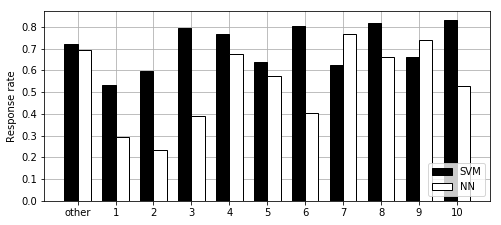

In [48]:
# result of `resultReward` and `resultResponseRatio`
"""
[[ -954.6  -243.1  -466.3  -234.9  -377.1  -158.1  -189.2  -265.4  -210.2
   -127.5   -49.5]
 [-1039.4  -141.4  -129.   -162.    -35.5   -62.5  -134.7   -34.6  -130.7
    -32.1   -19. ]]
[[0.720011   0.53228435 0.59490083 0.79537774 0.76666028 0.63824792
  0.80389902 0.62358735 0.81888067 0.66287428 0.83295978]
 [0.69154703 0.29472797 0.23193012 0.3896916  0.67577955 0.57304612
  0.4013819  0.76618782 0.6599013  0.73799442 0.52544098]]
"""
data = [
    [0.720011, 0.53228435, 0.59490083, 0.79537774, 0.76666028, 0.63824792,
      0.80389902, 0.62358735, 0.81888067, 0.66287428, 0.83295978],
    [0.69154703, 0.29472797, 0.23193012, 0.3896916, 0.67577955, 0.57304612,
      0.4013819, 0.76618782, 0.6599013, 0.73799442, 0.52544098],
]

N = len(data[0])

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(8, 3.5))
rects1 = ax.bar(ind, data[0], width, color='k', edgecolor='k')
#rects2 = ax.bar(ind + width, data[1], width, color='y', yerr=women_std)
rects2 = ax.bar(ind + width, data[1], width, color='w', edgecolor='k')

# add some text for labels, title and axes ticks
ax.set_ylabel('Response rate')
#ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('other', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))

#Axis.set_axisbelow(True)
#ax.grid(True, linestyle='dashed')
ax.grid() 
ax.set_axisbelow(True)

ax.legend((rects1[0], rects2[0]), ('SVM', 'NN'), loc=4)

fig.savefig("export_figures/baseline_response_rate.pdf", bbox_inches='tight')

In [ ]:
#